In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [4]:
# Load CSV file
df = pd.read_csv('BostonHousing.csv')

# Display the first few rows
df.head()


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [6]:
# Separate features and target (usually the target is "MEDV")
X = df.drop(columns=['medv'])  # Features
y = df['medv']  # Target


In [7]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [9]:
# Simple linear regression using DNN (1 dense layer)
model = keras.Sequential([
    keras.layers.Dense(1, input_shape=[X.shape[1]])
])


C:\Users\anike\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])


In [11]:
history = model.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2, verbose=1)


Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 602.5553 - mae: 22.9747 - val_loss: 546.8868 - val_mae: 22.2211
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 572.5146 - mae: 22.4788 - val_loss: 546.1309 - val_mae: 22.2126
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 579.0215 - mae: 22.6966 - val_loss: 545.3745 - val_mae: 22.2044
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 598.1150 - mae: 22.8679 - val_loss: 544.6583 - val_mae: 22.1955
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 611.5624 - mae: 23.2640 - val_loss: 543.9655 - val_mae: 22.1868
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 605.1280 - mae: 23.0934 - val_loss: 543.2843 - val_mae: 22.1780
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 586.8809 - mae: 22.8205 - val_loss: 542.5629 - val_mae: 22.1697
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 591.4261 - mae: 22.8665 - val_loss: 541.8270 - val_mae: 22.1611
Epoch 9/

In [12]:
loss, mae = model.evaluate(X_test_scaled, y_test)
print(f"Test Mean Absolute Error: {mae:.2f}")


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 465.0204 - mae: 20.8543
Test Mean Absolute Error: 21.16


Epoch 1/200


C:\Users\anike\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 614.7330 - mae: 23.0008 - val_loss: 528.4114 - val_mae: 21.3820
Epoch 2/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 578.5011 - mae: 22.1227 - val_loss: 496.7417 - val_mae: 20.5946
Epoch 3/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 553.3377 - mae: 21.2488 - val_loss: 450.6862 - val_mae: 19.4013
Epoch 4/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 532.8704 - mae: 20.3548 - val_loss: 384.5573 - val_mae: 17.6159
Epoch 5/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 383.8175 - mae: 16.9719 - val_loss: 294.2391 - val_mae: 15.0848
Epoch 6/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 323.3051 - mae: 15.1770 - val_loss: 185.1508 - val_mae: 11.4691
Epoch 7/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 184.3226 - mae: 11.2005 - val_loss: 97.8338 - val_mae: 7.6262
Epoch 8/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 107.7187 - mae: 8.1065 - val_loss: 57.6855 - val_mae: 5.5320
Epoch 9/200
11/11 ━━━━━━━

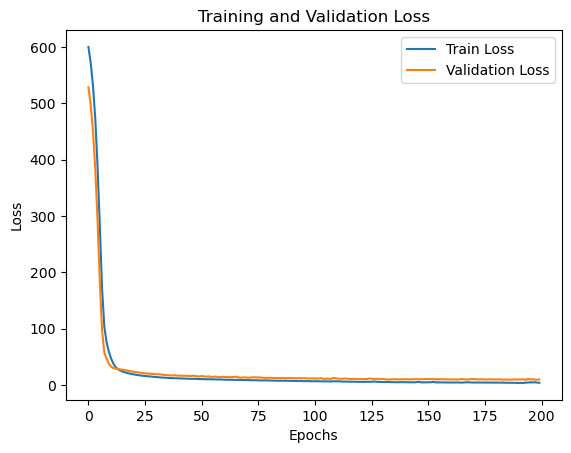

In [14]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

# Load CSV file (assuming boston.csv is in the same directory)
df = pd.read_csv('BostonHousing.csv')

# Split features and target
X = df.drop(columns=['medv'])  # Features
y = df['medv']  # Target

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build a deeper model with more layers
model = keras.Sequential([
    keras.layers.Dense(64, input_shape=[X.shape[1]], activation='relu'),  # First hidden layer
    keras.layers.Dense(32, activation='relu'),  # Second hidden layer
    keras.layers.Dense(16, activation='relu'),  # Third hidden layer
    keras.layers.Dense(1)  # Output layer (no activation)
])

# Compile the model with a learning rate adjustment
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), 
              loss='mse', 
              metrics=['mae'])

# Train the model with more epochs and a batch size adjustment
history = model.fit(X_train_scaled, y_train, epochs=200, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model on the test data
loss, mae = model.evaluate(X_test_scaled, y_test)
print(f"Test Mean Absolute Error: {mae:.2f}")

# Calculate R² (Coefficient of Determination)
preds = model.predict(X_test_scaled)
r2 = r2_score(y_test, preds)
print(f"R² Score: {r2:.2f}")

# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(y_test, preds))
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")




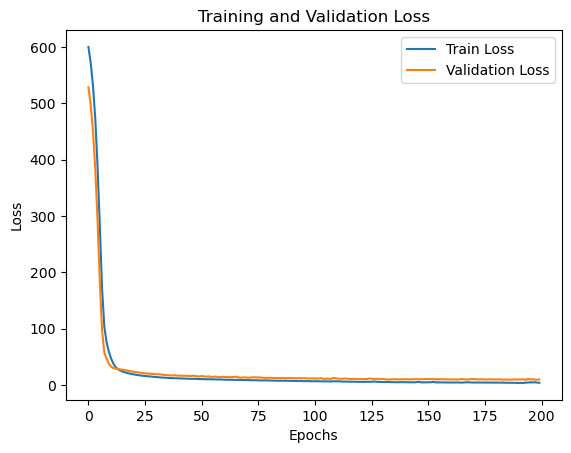

In [15]:
# Plot training and validation loss over epochs
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()